<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

**<center><h3>Support Vector Machines Assignment Solution</h3></center>**

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br>
  - **7.2** [**Data Standardization**](#Section72)<br>
  - **7.3** [**Data Preparation**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Support Vector Machine Classifier - RBF Kernel**](#Section81)<br>
  - **8.2** [**Support Vector Machine Classifier - Sigmoid Kernel**](#Section82)<br>
  - **8.3** [**Support Vector Machine Classifier - Polynomial Kernel**](#Section83)<br>

**9.** [**Conclusion**](#Section9)<br>



---
<a name = Section1></a>
# **1. Problem Statement**
---

- The **database** was created to **identify** a voice as **male or female**, based upon acoustic properties of the **voice and speech**.

- The dataset consists of **3,168 recorded voice samples**, collected from male and female speakers. 

- The voice samples are **pre-processed by acoustic analysis** in R using the seewave and tuneR packages.

- Additionally, samples have been analyzed with **frequency range** of **0Hz-280Hz** (human vocal range).

---
<a name = Section2></a>
# **2. Objective**
---

- The objective of this assignment is to **predict** the **gender** based on the voice features.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

     |████████████████████████████████| 71kB 4.6MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling

     |████████████████████████████████| 266kB 9.3MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 3.1MB 15.6MB/s 
     |████████████████████████████████| 604kB 59.5MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 296kB 78.7MB/s 


<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from sklearn.preprocessing import StandardScaler                    # To scale the data with mean = 0 and std = 1
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.svm import SVC                                         # To create model for support vector classifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This corpus has been collected from free for research sources at the Internet and it can be retrieved from the attached <a href = "https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/spam.csv">**link**</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 3168 | 21 | 1.01 MB| 

|Id|Feature|Description|
|:--|:--|:--|
|01|**meanfreq**|Mean frequency of voice (in kHz).|
|02|**sd**|Standard deviation of frequency of voice.|
|03|**median**|Median frequency of voice (in kHz).|
|04|**Q25**|First quantile value (in kHz).|
|05|**Q75**|Third quantile value (in kHz).|
|06|**IQR**|Interquantile range (in kHz).|
|07|**skew**|Skewness (see note in specprop description).|
|08|**kurt**|Kurtosis (see note in specprop description).|
|09|**sp.ent**|Spectral entropy of voice.|
|10|**sfm**|Spectral flatness of voice.|
|11|**mode**|Mode frequency of voice.|
|12|**centroid**|Frequency centroid (see specprop).|
|13|**meanfun**|Average of fundamental frequency measured across acoustic signal.|
|14|**minfun**|Minimum fundamental frequency measured across acoustic signal.|
|15|**maxfun**|Maximum fundamental frequency measured across acoustic signal.|
|16|**meandom**|Average of dominant frequency measured across acoustic signal.|
|17|**mindom**|Minimum of dominant frequency measured across acoustic signal.|
|18|**maxdom**|Maximum of dominant frequency measured across acoustic signal.|
|19|**dfrange**|Range of dominant frequency measured across acoustic signal.|
|20|**modindx**|Modulation index. Calculated as the accumulated absolute difference |
|||between adjacent measurements of fundamental frequencies divided by the frequency range|
|21|**label**|Target containing male or female.|

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/voice.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get desription about the numerical features.

In [ ]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

**Observation:**

- We can see that there are **no null values present** inside our data.

- We can also see that all the **features** are having **correct data type**.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df = data)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')


Accomplished!


In [ ]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation:**

- Report shows that there are **21 variables** out of which **20** are **numerical** and **one** is **categorical**.

- We can observe that there are **2 duplicate** rows available.

- **label** feature is **normally distributed**.

- Features like **mode(7.4%)**, **dfrange(2.1%)**, **modindx(2.1%)** are having **zero data**.

- **median** is **highly correlated** with **meanfreq** and 1 other fields.

- **Q25** is **highly correlated** with **meanfreq** and 1 other fields.

- **kurt** is **highly correlated** with **skew**.

- **centroid** is **highly correlated** with **meanfreq** and 2 other fields.

- **dfrange** is **highly correlated** with **maxdom**.

---
**<h4>Question 1:** Create a function which takes data as input and remove duplicates.</h4>

---

- Additionlly, you need to show the amount of data dropped during operations.

**Performing Operations**

In [ ]:
def handle_duplicates(data):

  before_shape = data.shape
  print('Data Shape [Before]:', before_shape)

  data.drop_duplicates(inplace = True)

  after_shape = data.shape
  print('Data Shape [After]:', after_shape)

  drop_nums = before_shape[0] - after_shape[0]
  drop_percent = np.round(drop_nums / before_shape[0], decimals = 5) * 100

  print('Drop Ratio:', drop_percent, '%')

In [ ]:
handle_duplicates(data)

Data Shape [Before]: (3168, 21)
Data Shape [After]: (3166, 21)
Drop Ratio: 0.063 %


**Observation:**

- We have successfully handled duplicate data.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

---
**<h4>Question 2:** Show the frequency and proportion of male and female using "label" feature.</h4>

---

In [ ]:
def plotLabel():
  colors_list = ['gold', 'lightcoral']
  figure = plt.figure(figsize = [13.66, 7.3])
  plt.subplot(1, 2, 1)
  sns.barplot(data['label'].value_counts().index, data['label'].value_counts(), palette  = colors_list)
  plt.xlabel('Transaction Type', size = 14)
  plt.ylabel('Frequency', size = 14)
  plt.title('Frequency occurence of each transaction type', y=1.05, size = 16)

  explode_list = [0.1, 0]

  plt.subplot(1, 2, 2)
  data['label'].value_counts().plot(kind='pie', figsize=[13.66, 7.3], autopct='%1.1f%%', 
                                        startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)
  plt.title('Proportion of each transaction type', y=1.05, size = 16)
  plt.ylabel('')
  plt.axis('equal')
  plt.legend(labels = data['label'].value_counts().index, loc = 'upper left', frameon=False)
  plt.tight_layout(pad=2.0)
  plt.show()

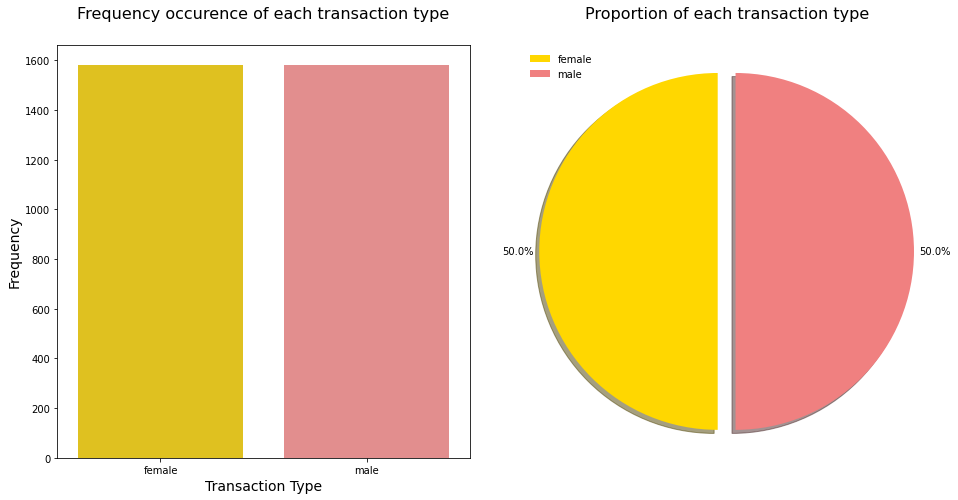

In [ ]:
plotLabel()

**Observation:**

- We can see that our feature of interest is normally distributed.

<a name = Section7></a>

---
# **7. Post Data Processing**
---

- Now we will **transform** our **data** into **compatible format** so that machine can understand.

- We can observe that **label feature** contains categories which we need to **convert** into **numerics**.

<a name = Section71></a>
## **7.1 Data Encoding**

---
**<h4>Question 3:** Create a function which converts the label feature categories to numeric.</h4>

---

- More specifically female should be valued as 0 and male as 1.

In [ ]:
def dataEncoding():
  
  # Assigning female = 0 and male = 1
  data['label'] = np.where(data['label'] == 'female', 0, 1)

In [ ]:
# Calling the User Defined Function
dataEncoding()

print('Encoding Success!')

Encoding Success!


<a name = Section72></a>
## **7.2 Data Standardization**


---
**<h4>Question 4:** Create a function which scales the input features with mean = 0 and standard deviation = 1.</h4>

---

- You need to create an object of StandardScaler() and perform operation over data except "label" feature.

In [ ]:
def dataScaling(data, input_drop = None):

  # Creating a scaling object
  scaler = StandardScaler()

  # Fitting the input features and excluding "label" feature
  data_fit = scaler.fit_transform(data.drop(labels = input_drop, axis = 1))

  # Creating dataframe of scaled features
  data_scaled = pd.DataFrame(data = data_fit, columns = data.drop(labels = input_drop, axis = 1).columns)

  return data_scaled

In [ ]:
# Calling the User Defined Function
data_scaled = dataScaling(data = data, input_drop = 'label')

print('Scaling Success!')

Scaling Success!


<a name = Section73></a>
## **7.3 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

---
**<h4>Question 5:** Create a function which split the data into training and testing parts.</h4>

---

- **Split** the data into **80:20** along with the **stratify** parameter inside train_test_split.

- Make sure to set the **random_state = 42**.

In [ ]:
def dataPrep(input = None, target = None, test_size = None):

  # Splitting data with stratified fashion
  X_train, X_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 42, stratify = target)

  # Final Data Splitting Shape
  print('Training Data Shape:', X_train.shape, y_train.shape)
  print('Testing Data Shape:', X_test.shape, y_test.shape)

  return X_train, X_test, y_train, y_test

In [ ]:
# Calling the User Defined Function
X_train, X_test, y_train, y_test = dataPrep(input = data_scaled, target = data['label'], test_size = 0.25)

Training Data Shape: (2532, 20) (2532,)
Testing Data Shape: (634, 20) (634,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Support Vector Classifier** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **precision and recall value**.

- **Remember** that **we want generalize results** i.e. same results or error on testing data as that of training data.

---
**<h4>Question 6:** Create a function that plots precision and recall curve.</h4>

---

- You can use precision_recall_curve() and estimated the average precision and recall over the returned values.

- You need to plot a line plot over the precision and recall values returned by precision_recall_curve().

In [ ]:
def plot_precision_recall(y_true, y_pred, train_or_test):
  '''
  y_true: Acutal values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot avergae values "precision" or "recall"
  train_or_test: Train Data or Test Data
  '''
  precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)

  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
  plt.plot([0, 1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0, 1], 'g-')
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.ylabel('Precision', fontsize = 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(True)

---
**<h4>Question 7:** Create a function that plots confusion matrix over training and testing data.</h4>

---

- You can use plot_confusion_matrix with the suplots of the figure to show side by side comparison.

In [ ]:
def plotConfusion(model = None):

  fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))

  plot_confusion_matrix(estimator = model, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
  plot_confusion_matrix(estimator = model, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
  
  ax1.set_title(label = 'Train Data', size = 14)
  ax2.set_title(label = 'Test Data', size = 14)
  ax1.grid(b = False)
  ax2.grid(b = False)
  plt.suptitle(t = 'Confusion Matrix', size = 16)
  plt.show()

---
**<h4>Question 8:** Create a function that plots classification report over training and testing data.</h4>

---

- You can use classification_report() to show side by side comparison over training and testing data.

In [ ]:
def plotClassificationReport(model = None):

  y_train_pred_count = model.predict(X_train)
  y_test_pred_count = model.predict(X_test)

  logistic_report_train = classification_report(y_train, y_train_pred_count)
  logistic_report_test = classification_report(y_test, y_test_pred_count)
  print('                    Training Report          ')
  print(logistic_report_train)
  print('                    Testing Report           ')
  print(logistic_report_test)

---
**<h4>Question 9:** Create a function that plots Precision and Recall Curve over training and testing data.</h4>

---

- **Note:** This function is entirely different from Question 6.
- We are using plot_precision_recall() made in Question 6 over here.
- You can plot the precision and recall over training and testing data side by side with the help of subplots.

In [ ]:
def plotPRCurve(model = model):

  y_train_pred_proba = model.predict_proba(X_train)
  y_test_pred_proba = model.predict_proba(X_test)

  figure = plt.figure(figsize = [15, 7])
  plt.subplot(1, 2, 1)
  plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

  plt.subplot(1, 2, 2)
  plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

  plt.suptitle('Precision & Recall Curve', size = 16)
  plt.show()

<a name = Section81></a>
## **8.1 Support Vector Machine Classifier - RBF Kernel**

---
**<h4>Question 10:** Create a function that fits the SVC() over training data and returns the model.</h4>

---

- Use the probability = True and kernel = 'rbf'.

In [ ]:
def modelFit():
  
  # To plot confusion matrix probability = True is required
  svc = SVC(probability = True, kernel = 'rbf')
  svc.fit(X_train, y_train)

  return svc

- Call the modelFit() method created earlier and plot the confusion matrix using plotConfusion()

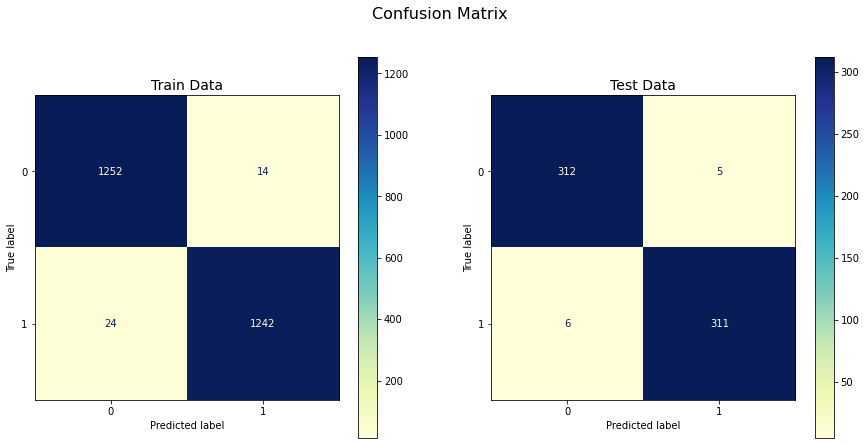

In [ ]:
# Calling fit over default setting
model = modelFit()

# Calling User Defined Function to plot confusion matrix
plotConfusion(model = model)

- Call the plotClassificationReport() method created earlier over the model.

In [ ]:
plotClassificationReport(model = model)

                    Training Report          
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1266
           1       0.99      0.98      0.98      1266

    accuracy                           0.98      2532
   macro avg       0.99      0.98      0.98      2532
weighted avg       0.99      0.98      0.98      2532

                    Testing Report           
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       317
           1       0.98      0.98      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



- Call the plotPRCurve() method created earlier over the model.

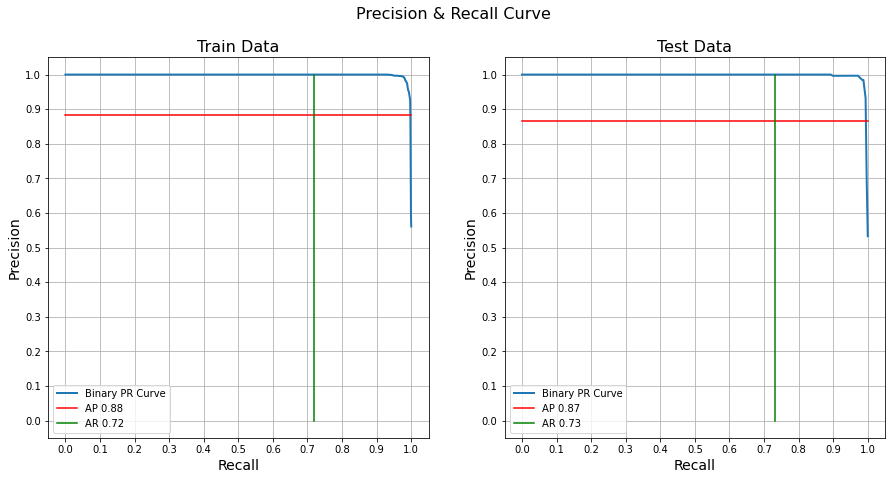

In [ ]:
plotPRCurve(model = model)

**Observation:**

- We can see pretty **good results** using **RBF kernel**.

- The **accuracy** on both training and testing data is pretty good i.e. **98%**.

- Additionally, the **Precision and Recall scores** are also **good** on both training data as well as on testing data.

<a name = Section82></a>
## **8.2 Support Vector Machine Classifier - Sigmoid Kernel**

---
**<h4>Question 11:** Create a function that fits the SVC() over training data and returns the model.</h4>

---

- Use the probability = True and kernel = 'sigmoid'.

In [ ]:
def modelFit():
  
  # To plot confusion matrix probability = True is required
  svc = SVC(kernel = 'sigmoid', probability = True)
  svc.fit(X_train, y_train)

  return svc

- Call the modelFit() method created earlier and plot the confusion matrix using plotConfusion().

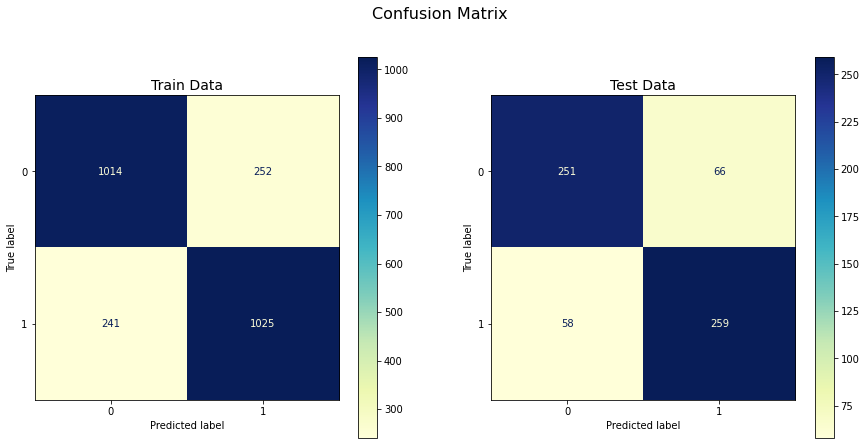

In [ ]:
# Calling fit over default setting
model = modelFit()

# Calling User Defined Function to plot confusion matrix
plotConfusion(model = model)

- Call the plotClassificationReport() method created earlier over the model.

In [ ]:
plotClassificationReport(model = model)

                    Training Report          
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1266
           1       0.80      0.81      0.81      1266

    accuracy                           0.81      2532
   macro avg       0.81      0.81      0.81      2532
weighted avg       0.81      0.81      0.81      2532

                    Testing Report           
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       317
           1       0.80      0.82      0.81       317

    accuracy                           0.80       634
   macro avg       0.80      0.80      0.80       634
weighted avg       0.80      0.80      0.80       634



- Call the plotPRCurve() method created earlier over the model.

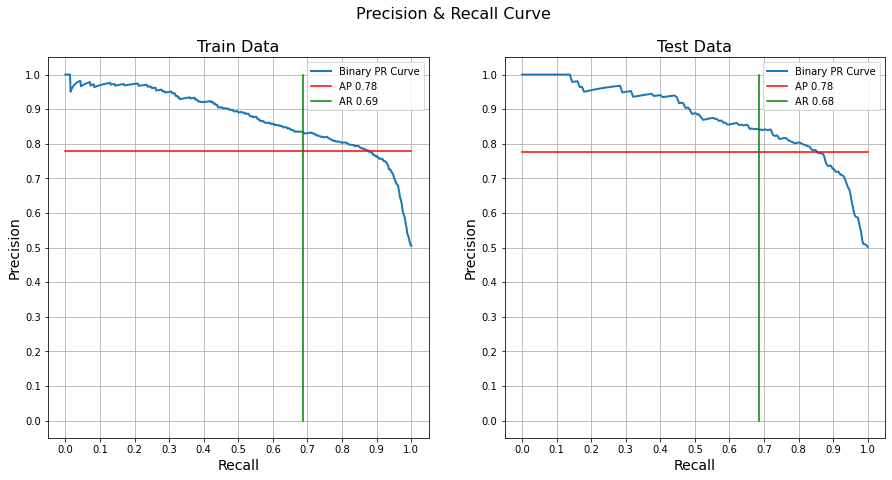

In [ ]:
plotPRCurve(model = model)

**Observation:**

- We can see **good results** using **Sigmoid kernel** but **not that good** as that of **RBF kernel**.

- The **accuracy** on both training and testing data is around **80%** which is pretty low.

- Additionally, the **Precision and Recall scores** are also **okay** on both training data as well as on testing data.

<a name = Section83></a>
## **8.3 Support Vector Machine Classifier - Polynomial Kernel**

---
**<h4>Question 12:** Create a function that fits the SVC() over training data and returns the model.</h4>

---

- Use the probability = True and kernel = 'poly'.

In [ ]:
def modelFit():
  
  # To plot confusion matrix probability = True is required
  svc = SVC(kernel = 'poly', probability = True)
  svc.fit(X_train, y_train)

  return svc

- Call the modelFit() method created earlier and plot the confusion matrix using plotConfusion().

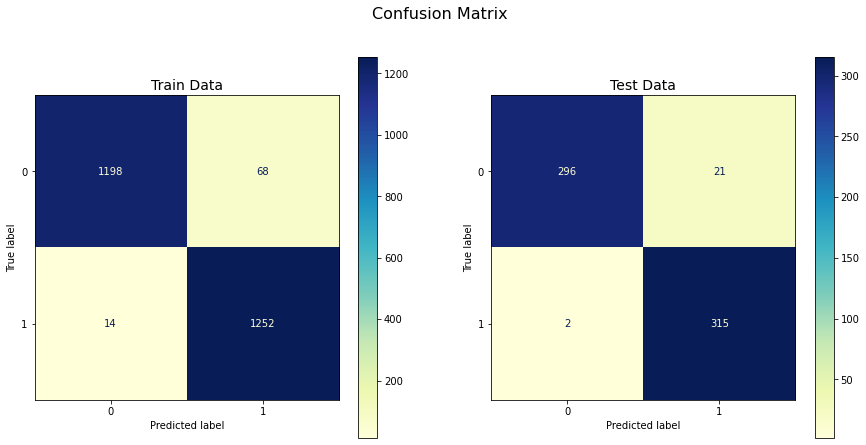

In [ ]:
# Calling fit over default setting
model = modelFit()

# Calling User Defined Function to plot confusion matrix
plotConfusion(model = model)

- Call the plotClassificationReport() method created earlier over the model.

In [ ]:
plotClassificationReport(model = model)

                    Training Report          
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1266
           1       0.95      0.99      0.97      1266

    accuracy                           0.97      2532
   macro avg       0.97      0.97      0.97      2532
weighted avg       0.97      0.97      0.97      2532

                    Testing Report           
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       317
           1       0.94      0.99      0.96       317

    accuracy                           0.96       634
   macro avg       0.97      0.96      0.96       634
weighted avg       0.97      0.96      0.96       634



- Call the plotPRCurve() method created earlier over the model.

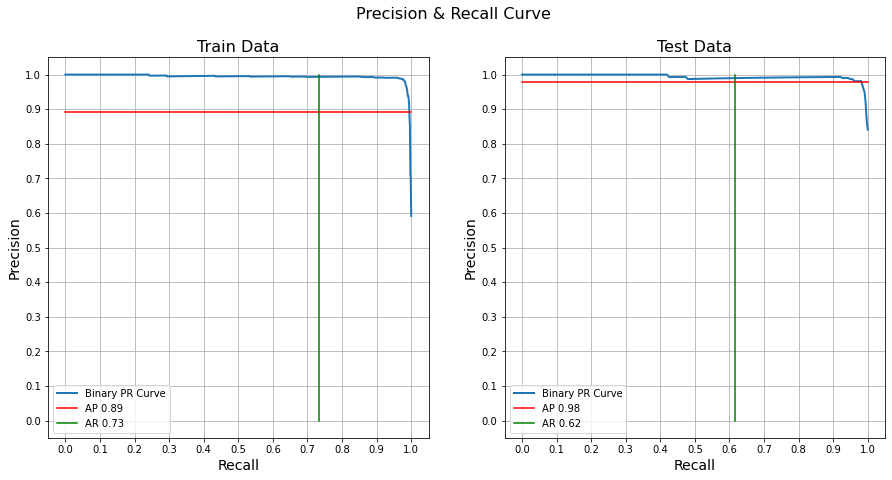

In [ ]:
plotPRCurve(model = model)

**Observation:**

- We can see **good results** using **Polynomial kernel** but **not that good** as that of **RBF kernel**.

- The **accuracy** on both training and testing data is around **97%** which is okay.

- Additionally, the **Precision and Recall scores** are also **okay** on both training data as well as on testing data.

<a name = Section9></a>

---
# **9. Conclusion**
---

- We can see that **SVC worked pretty good** on default setting i.e. **rbf kernel**.

- So we **finalized SVC** using rbf setting.

- This **model** now can **help us** in **identifying** which person is male and female using voice attributes. 